In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
#connectedをTrueにすると、PlotlyのJavascriptをインターネットから取得するようになります。
init_notebook_mode(connected=True)

In [2]:
import pandas_profiling as pdp

In [4]:
cd Downloads/restaurant-revenue-prediction/

/Users/hasegawatakashikana/Downloads/restaurant-revenue-prediction


In [135]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
pdp.ProfileReport(train)

In [7]:
pdp.ProfileReport(test)

In [8]:
def gp(df,col,y, title):
    """
    グループ化棒グラフを表示
    df:  使用するデータ
    col: 表示する列
    y : 目標値の列（今回は中身が1か0）
    title: 図のタイトル
    """
    df1 = df[df[y] == 1]
    df0 = df[df[y] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()

    trace1 = go.Bar(x=a1.index, y=a1.values, name='{} : 1'.format(y), marker=dict(color="#44ff54"))
    trace2 = go.Bar(x=b1.index, y=b1.values, name='{} : 0'.format(y), marker=dict(color="#ff4444"))

    data = [trace1, trace2]
    layout = go.Layout(barmode='group', height=300, title = title)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='grouped-bar')



In [9]:
train.columns

Index(['Id', 'Open_Date', 'City', 'City_Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [230]:
trainData = train.drop("Id",axis=1)
testData = test.drop("Id",axis=1)

In [57]:
trainData.head()

Open Date        City  City Group Type  P1   P2   P3   P4  P5  P6  \
0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   
1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   
2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3   
3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4   4   
4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   

     ...      P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0    ...      3.0    5    3    4    5    5    4    3    4  5653753.0  
1    ...      3.0    0    0    0    0    0    0    0    0  6923131.0  
2    ...      3.0    0    0    0    0    0    0    0    0  2055379.0  
3    ...      7.5   25   12   10    6   18   12   12    6  2675511.0  
4    ...      3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 42 columns]

In [137]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y') 
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y') 

In [138]:
trainData["Open_days"]=" "
testData["Open_days"]=" "

In [139]:
dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y') 

In [20]:
dateLastTrain

Date
0    01/01/2015
1    01/01/2015
2    01/01/2015
3    01/01/2015
4    01/01/2015
5    01/01/2015
6    01/01/2015
7    01/01/2015
8    01/01/2015
9    01/01/2015
10   01/01/2015
11   01/01/2015
12   01/01/2015
13   01/01/2015
14   01/01/2015
15   01/01/2015
16   01/01/2015
17   01/01/2015
18   01/01/2015
19   01/01/2015
20   01/01/2015
21   01/01/2015
22   01/01/2015
23   01/01/2015
24   01/01/2015
25   01/01/2015
26   01/01/2015
27   01/01/2015
28   01/01/2015
29   01/01/2015
..          ...
107  01/01/2015
108  01/01/2015
109  01/01/2015
110  01/01/2015
111  01/01/2015
112  01/01/2015
113  01/01/2015
114  01/01/2015
115  01/01/2015
116  01/01/2015
117  01/01/2015
118  01/01/2015
119  01/01/2015
120  01/01/2015
121  01/01/2015
122  01/01/2015
123  01/01/2015
124  01/01/2015
125  01/01/2015
126  01/01/2015
127  01/01/2015
128  01/01/2015
129  01/01/2015
130  01/01/2015
131  01/01/2015
132  01/01/2015
133  01/01/2015
134  01/01/2015
135  01/01/2015
136  01/01/2015

[137 rows x 1 columns]

In [140]:
trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']

In [141]:
trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

trainData = trainData.drop('Open Date', axis=1)
testData = testData.drop('Open Date', axis=1)

In [142]:
typeDummy = pd.get_dummies(trainData['Type'])
trainData = trainData.join(typeDummy)
typeDummyTest = pd.get_dummies(testData['Type'])
testData = testData.join(typeDummyTest)

trainData = trainData.drop('Type', axis=1)
testData = testData.drop('Type', axis=1)

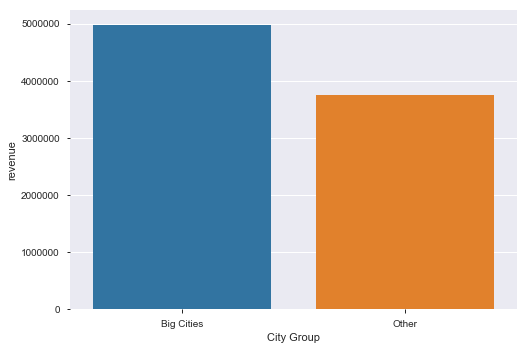

In [65]:
cityPerc = trainData[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)

In [143]:
citygroupDummy = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummy)

In [144]:
citygroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(citygroupDummyTest)

trainData = trainData.drop('City Group', axis=1)
testData = testData.drop('City Group', axis=1)

In [145]:
citygroupDummy = pd.get_dummies(trainData['City'])
trainData = trainData.join(citygroupDummy)
citygroupDummyTest = pd.get_dummies(testData['City'])
testData = testData.join(citygroupDummyTest)

trainData = trainData.drop('City', axis=1)
testData = testData.drop('City', axis=1)

In [90]:
trainData.head()

P1   P2   P3   P4  P5  P6  P7  P8  P9  P10 ...  Tekirdağ  Tokat  Trabzon  \
0   4  5.0  4.0  4.0   2   2   5   4   5    5 ...         0      0        0   
1   4  5.0  4.0  4.0   1   2   5   5   5    5 ...         0      0        0   
2   2  4.0  2.0  5.0   2   3   5   5   5    5 ...         0      0        0   
3   6  4.5  6.0  6.0   4   4  10   8  10   10 ...         0      1        0   
4   3  4.0  3.0  4.0   2   2   5   5   5    5 ...         0      0        0   

   Uşak  İstanbul  İzmir  Şanlıurfa  DT  FC  IL  
0     0         1      0          0   0   0   1  
1     0         0      0          0   0   1   0  
2     0         0      0          0   0   0   1  
3     0         0      0          0   0   0   1  
4     0         0      0          0   0   0   1  

[5 rows x 79 columns]

In [69]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,LassoCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [146]:
data_input = trainData.drop("revenue",axis=1) 
data_output = trainData["revenue"]

In [37]:
#validation function
n_folds =5

def rmsle_cv(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(data_input.values)
    rmse = np.sqrt(-cross_val_score(model,data_input.values,data_output,scoring="neg_mean_squared_error",cv=kf))
    print(cross_val_score(model,data_input.values,data_output,scoring="neg_mean_squared_error",cv=kf))
    return(rmse)

In [205]:
#値が数値
numericcols = data_input.dtypes[data_input.dtypes != object]
#値が定量評価不能
categorcols = data_input.dtypes[data_input.dtypes == object]

In [147]:
trainData = trainData.drop("Open_days",axis=1)
testData = testData.drop("Open_days",axis=1)

In [206]:
categorcols

Open_days    object
dtype: object

In [208]:
data_input=data_input.drop("Open_days",axis=1)

In [109]:
linreg.fit(data_input,data_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
rmsle_cv(linreg).mean()

[-3.73415148e+13 -1.09673765e+13 -3.20758563e+13 -1.06974304e+13
 -1.93075547e+13]


4550151.472713527

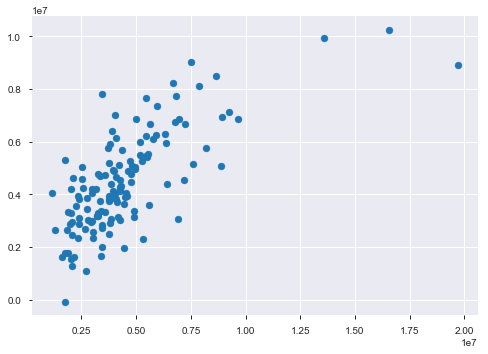

In [111]:
fig,ax =plt.subplots()
ax.scatter(x=data_output,y=linreg.predict(data_input))

In [114]:
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
kfolds = KFold(n_splits=5,shuffle=True,random_state=42)
lasso = make_pipeline(RobustScaler(),LassoCV(max_iter=1e7,alphas=alphas2,random_state=42,cv=kfolds))
lasso.fit(data_input,data_output)


Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lassocv', LassoCV(alphas=[5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008],
    copy_X=True, cv=KFold(n_splits=5, random_state=42, shuffle=True),
    ...tive=False, precompute='auto',
    random_state=42, selection='cyclic', tol=0.0001, verbose=False))])

In [124]:
data_input.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'OpenDays', 'Big Cities',
       'Other', 'Adana', 'Afyonkarahisar', 'Amasya', 'Ankara', 'Antalya',
       'Aydın', 'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır',
       'Edirne', 'Elazığ', 'Eskişehir', 'Gaziantep', 'Isparta', 'Karabük',
       'Kastamonu', 'Kayseri', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli',
       'Muğla', 'Osmaniye', 'Sakarya', 'Samsun', 'Tekirdağ', 'Tokat',
       'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa', 'DT', 'FC', 'IL'],
      dtype='object')

In [221]:
catcol = c.columns
a = data_input.columns
for col in catcol :
    if col   in a:
        catcol = catcol.drop(col)

In [191]:
testData = testData.drop(catcol,axis=1)

In [222]:
catcol

Index(['revenue'], dtype='object')

In [203]:
c = testData.assign(revenue=0, Amasya=0, Elazığ=0, Karabük=0, Kastamonu=0, Osmaniye=0,
       Tokat=0)
c.head()

P1   P2   P3   P4  P5  P6  P7  P8  P9  P10   ...     İstanbul  İzmir  \
0   1  4.0  4.0  4.0   1   2   5   4   5    5   ...            0      0   
1   3  4.0  4.0  4.0   2   2   5   3   4    4   ...            0      0   
2   3  4.0  4.0  4.0   2   2   5   4   4    5   ...            0      0   
3   2  4.0  4.0  4.0   2   3   5   4   5    4   ...            0      0   
4   2  4.0  4.0  4.0   1   2   5   4   5    4   ...            0      0   

   Şanlıurfa  Amasya  Elazığ  Karabük  Kastamonu  Osmaniye  Tokat  revenue  
0          0       0       0        0          0         0      0        0  
1          0       0       0        0          0         0      0        0  
2          0       0       0        0          0         0      0        0  
3          0       0       0        0          0         0      0        0  
4          0       0       0        0          0         0      0        0  

[5 rows x 78 columns]

In [210]:
c=c.drop("Open_days",axis=1)

KeyError: "['Open_days'] not found in axis"

In [193]:
c.head()

P1   P2   P3   P4  P5  P6  P7  P8  P9  P10 ...  Muğla  Sakarya  Samsun  \
0   1  4.0  4.0  4.0   1   2   5   4   5    5 ...      0        0       0   
1   3  4.0  4.0  4.0   2   2   5   3   4    4 ...      0        0       0   
2   3  4.0  4.0  4.0   2   2   5   4   4    5 ...      0        0       0   
3   2  4.0  4.0  4.0   2   3   5   4   5    4 ...      0        0       0   
4   2  4.0  4.0  4.0   1   2   5   4   5    4 ...      0        0       0   

   Tekirdağ  Trabzon  Uşak  İstanbul  İzmir  Şanlıurfa  a  
0         0        0     0         0      0          0  0  
1         0        0     0         0      0          0  0  
2         0        0     0         0      0          0  0  
3         0        0     0         0      0          0  0  
4         0        0     0         0      0          0  0  

[5 rows x 72 columns]

In [212]:
data_input.shape

(137, 77)

In [198]:
for col in a:
    if col in catcol:
        a = a.drop(col)
print(a.shape)

(7,)


In [213]:
c.shape

(100000, 78)

In [151]:
trainData.head()

P1   P2   P3   P4  P5  P6  P7  P8  P9  P10    ...      Osmaniye  Sakarya  \
0   4  5.0  4.0  4.0   2   2   5   4   5    5    ...             0        0   
1   4  5.0  4.0  4.0   1   2   5   5   5    5    ...             0        0   
2   2  4.0  2.0  5.0   2   3   5   5   5    5    ...             0        0   
3   6  4.5  6.0  6.0   4   4  10   8  10   10    ...             0        0   
4   3  4.0  3.0  4.0   2   2   5   5   5    5    ...             0        0   

   Samsun  Tekirdağ  Tokat  Trabzon  Uşak  İstanbul  İzmir  Şanlıurfa  
0       0         0      0        0     0         1      0          0  
1       0         0      0        0     0         0      0          0  
2       0         0      0        0     0         0      0          0  
3       0         0      1        0     0         0      0          0  
4       0         0      0        0     0         0      0          0  

[5 rows x 78 columns]

In [131]:
testData=testData.drop(catcol,axis=1)

In [148]:
testData.head()

P1   P2   P3   P4  P5  P6  P7  P8  P9  P10    ...      Trabzon  Uşak  \
0   1  4.0  4.0  4.0   1   2   5   4   5    5    ...            0     0   
1   3  4.0  4.0  4.0   2   2   5   3   4    4    ...            0     0   
2   3  4.0  4.0  4.0   2   2   5   4   4    5    ...            0     0   
3   2  4.0  4.0  4.0   2   3   5   4   5    4    ...            0     0   
4   2  4.0  4.0  4.0   1   2   5   4   5    4    ...            0     0   

   Yalova  Zonguldak  Çanakkale  Çankırı  Çorum  İstanbul  İzmir  Şanlıurfa  
0       0          0          0        0      0         0      0          0  
1       0          0          0        0      0         0      0          0  
2       0          0          0        0      0         0      0          0  
3       0          0          0        0      0         0      0          0  
4       0          0          0        0      0         0      0          0  

[5 rows x 101 columns]

In [224]:
c = c.drop("revenue",axis=1)

In [227]:

lasso_output_train = lasso.predict(data_input)
lasso_output = lasso.predict(c)
lasso_output.shape

(100000,)

In [228]:
lasso_output

array([ -2750815.30832891,  -4818922.95295981,   -476346.07796725, ...,
        -3489076.9175639 , -11964495.84858201,   3360204.48294746])

In [229]:
answer = np.abs(lasso_output)

In [233]:
testData.head()

Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   2   
1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   2   
2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   
3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   
4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   

  ...   P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
0 ...   2.0  3.0    0    0    0    0    0    0    0    0  
1 ...   1.0  3.0    0    0    0    0    0    0    0    0  
2 ...   2.0  3.0    0    0    0    0    0    0    0    0  
3 ...   2.0  3.0    0    4    0    0    0    0    0    0  
4 ...   5.0  3.0    0    0    0    0    0    0    0    0  

[5 rows x 41 columns]

In [234]:

submission = pd.DataFrame({
        "Id": test["Id"],
        "Prediction": answer
    })
submission.to_csv('RandomForestSimple.csv',header=True, index=False)

In [239]:
# 訓練・テストデータの設定
train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)

In [252]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_class': 1882131,
    'verbose': 2,
}
params = {                                                                                               
    'boosting_type': 'gbdt',                                                                             
    'objective': 'regression_l2',                                                                           
    'metric': 'l2',                                                                             
    'num_leaves': 40,                                                                                    
    'learning_rate': 0.05,                                                                               
    'feature_fraction': 0.9,                                                                             
    'bagging_fraction': 0.8,                                                                             
    'bagging_freq': 5,   
    'lambda_l2': 2,
}                      

In [253]:
gbm = lgb.train(
    params,
    train_data,
    valid_sets=eval_data,
    num_boost_round=100,
    verbose_eval=5,
)
 

[5]	valid_0's l2: 8.05076e+12
[10]	valid_0's l2: 7.87745e+12
[15]	valid_0's l2: 7.91542e+12
[20]	valid_0's l2: 7.74154e+12
[25]	valid_0's l2: 7.74453e+12
[30]	valid_0's l2: 7.70158e+12
[35]	valid_0's l2: 7.77438e+12
[40]	valid_0's l2: 7.73353e+12
[45]	valid_0's l2: 7.66494e+12
[50]	valid_0's l2: 7.69677e+12
[55]	valid_0's l2: 7.65514e+12
[60]	valid_0's l2: 7.65921e+12
[65]	valid_0's l2: 7.71681e+12
[70]	valid_0's l2: 7.72417e+12
[75]	valid_0's l2: 7.73658e+12
[80]	valid_0's l2: 7.74221e+12
[85]	valid_0's l2: 7.74858e+12
[90]	valid_0's l2: 7.73985e+12
[95]	valid_0's l2: 7.72412e+12
[100]	valid_0's l2: 7.6466e+12


In [238]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(
    data_input, data_output, test_size=0.3, random_state=0,
)

In [245]:
y_train

66     1882131.0
89     2364478.0
63     1619683.0
90     3426169.0
15     3218918.0
106    4888774.0
40     6836483.0
135    7217634.0
61     4350573.0
3      2675511.0
52     1763231.0
107    3248660.0
56     2390534.0
6      5166635.0
76     4590423.0
134    2544857.0
111    2993069.0
120    4067566.0
109    4219263.0
125    4780607.0
110    2954086.0
68     3836721.0
98     2344689.0
105    2792031.0
119    3780019.0
11     5161370.0
133    9262754.0
93     3410878.0
41     4554237.0
95     1270499.0
         ...    
136    6363241.0
79     6313221.0
69     3452382.0
80     3727364.0
20     5525735.0
132    5787594.0
72     2525375.0
77     1904842.0
25     3778621.0
37     2740687.0
81     4066618.0
126    4015749.0
46     4250758.0
129    3939804.0
39     3818055.0
102    2738052.0
65     1756069.0
58     3004429.0
12     1734634.0
127    7592272.0
88     2025297.0
70     3982767.0
87     5906596.0
36     3028267.0
21     1149870.0
9      5444227.0
103    4429512.0
67     4052733

In [255]:
y_pred = gbm.predict(c, num_iteration=gbm.best_iteration)

In [256]:
y_pred.shape

(100000,)

In [257]:

submission = pd.DataFrame({
        "Id": test["Id"],
        "Prediction": y_pred
    })
submission.to_csv('RandomForestSimple2.csv',header=True, index=False)

In [ ]:
def score(model, X_train, y_train, X_valid = [], y_valid = []):
    #set_trace()
    rms = sqrt(mean_squared_error(np.square(np.exp(y_train)), np.square(np.exp(model.predict(X_train)))))
    score = [rms, model.score(X_train, y_train)]
    
    if len(X_valid) != 0 and len(y_valid) != 0:
        score.append(sqrt(mean_squared_error(np.square(np.exp(y_valid)), np.square(np.exp(model.predict(X_valid))))))
        
    if model.oob_score:
        score.append(model.oob_score_)
    
    return score